In [174]:
import pandas as pd
import yfinance as yf
import numpy as np
df = pd.concat(pd.read_excel('Fall2023 Challenge\dummy_data.xlsx',sheet_name= None),ignore_index =False)
df = df.reset_index()
df['Date'] = df['level_0']
df = df.drop(["level_0","level_1"],axis=1)
df

,Stock,Quantity,UnitCost,MarketPrice,Date
0,AAPL,100.000000,"""193.708419799804""",196.185074,2023-07-31
1,AMZN,80.000000,130.360001,133.679993,2023-07-31
2,META,105.000000,286.980011,"""318.600006103515""",2023-07-31
3,MSFT,120.000000,339.820526,335.210297,2023-07-31
4,NVDA,90.000000,422.941376,467.251526,2023-07-31
5,TSLA,45.000000,261.769989,267.429993,2023-07-31
6,GOOG,110.000000,120.970001,133.110001,2023-07-31
7,XOM,65.000000,NaN,106.36805,2023-07-31
8,JPM,30.000000,143.389938,155.733475,2023-07-31
9,JNJ,150.000000,164.326904,166.322418,2023-07-31


In [157]:
df['Date'][0]

'2023-07-31'

In [158]:
isinstance(df.loc[5,"UnitCost"],str)

False

In [175]:
dateList = list(df['Date'])

for index, row in df.iterrows():
    if pd.isna(row['MarketPrice']):
        ticker = row['Stock']
        date = row['Date']
        stock = yf.Ticker(ticker)
        stock_data = stock.history(start= dateList[0], end= date)['Close'][-1]
        df.at[index, 'MarketPrice'] = stock_data 
    if pd.isna(row['UnitCost']):
        ticker = row['Stock']   
        newDF = df.loc[(df["Stock"] == ticker)]
        val = np.mean(newDF['UnitCost'])
        df.at[index, 'UnitCost'] = val 
    if isinstance(row['UnitCost'],str):
        s = float(row['UnitCost'].replace('"',''))
        df.at[index, 'UnitCost'] = s 
    if isinstance(row['MarketPrice'],str):
        s = float(row['MarketPrice'].replace('"',''))
        df.at[index, 'MarketPrice'] = s 

        
df


C:\Users\shyam\AppData\Local\Temp\ipykernel_18820\908461938.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data = stock.history(start= dateList[0], end= date)['Close'][-1]


,Stock,Quantity,UnitCost,MarketPrice,Date
0,AAPL,100.000000,193.70842,196.185074,2023-07-31
1,AMZN,80.000000,130.360001,133.679993,2023-07-31
2,META,105.000000,286.980011,318.600006,2023-07-31
3,MSFT,120.000000,339.820526,335.210297,2023-07-31
4,NVDA,90.000000,422.941376,467.251526,2023-07-31
5,TSLA,45.000000,261.769989,267.429993,2023-07-31
6,GOOG,110.000000,120.970001,133.110001,2023-07-31
7,XOM,65.000000,106.377975,106.36805,2023-07-31
8,JPM,30.000000,143.389938,155.733475,2023-07-31
9,JNJ,150.000000,164.326904,166.322418,2023-07-31


In [160]:
uniqueDates = []
for x in df['Date']:
    if x not in uniqueDates:
        uniqueDates.append(x)
stocks = []
for x in df['Stock']:
    if x not in stocks:
        stocks.append(x)
columns = {"Stock":stocks}
vals = []
for i in range(len(uniqueDates)):
    newDF = df.loc[(df["Date"] == uniqueDates[i])]
    newDF = newDF.reset_index()
    assetVal = [] 
    for x in range(len(stocks)):
        if (i == 0):
            try:
                ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
                vals.append(newDF['UnitCost'][ind[0]])
            except:
                vals.append(0)
            if x == (len(stocks)-2):
                #vals.append(sum(vals))
                columns["Initial Date"] = vals    
        stockList = list(newDF['Stock'])
        if(stocks[x] in stockList):
            ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
            assetVal.append(newDF['MarketPrice'][ind[0]])
        else:
            assetVal.append(0)
    columns[uniqueDates[i]] = assetVal
assetValueDf = pd.DataFrame(columns)
assetValueDf

,Stock,Initial Date,2023-07-31,2023-08-31,2023-09-30
0,AAPL,193.708420,196.185074,187.616638,171.210007
1,AMZN,130.360001,133.679993,138.009995,0.000000
2,META,286.980011,318.600006,295.890015,300.209991
3,MSFT,339.820526,335.210297,327.067535,315.750000
4,NVDA,422.941376,467.251526,493.509338,434.954163
5,TSLA,261.769989,267.429993,258.079987,250.220001
6,GOOG,120.970001,133.110001,0.000000,0.000000
7,XOM,106.377975,106.368050,110.285942,117.580002
8,JPM,143.389938,155.733475,145.258163,143.957764
9,JNJ,164.326904,166.322418,160.514572,155.750000


In [182]:
uniqueDates = []
for x in df['Date']:
    if x not in uniqueDates:
        uniqueDates.append(x)
stocks = []
for x in df['Stock']:
    if x not in stocks:
        stocks.append(x)
stocks.append("NAV(Net Asset Value)")
columns = {"Stock":stocks}
vals = []
for i in range(len(uniqueDates)):
    newDF = df.loc[(df["Date"] == uniqueDates[i])]
    newDF = newDF.reset_index()
    assetVal = [] 
    for x in range(len(stocks)-1):
        if (i == 0):
            try:
                ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
                vals.append(newDF['Quantity'][ind[0]] * newDF['UnitCost'][ind[0]])
            except:
                vals.append(0)
            if x == (len(stocks)-2):
                vals.append(sum(vals))
                columns["Initial Date"] = vals    
        stockList = list(newDF['Stock'])
        if(stocks[x] in stockList):
            ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
            assetVal.append(newDF['Quantity'][ind[0]] * newDF['MarketPrice'][ind[0]])
        else:
            assetVal.append(0)
    assetVal.append(sum(assetVal))
    columns[uniqueDates[i]] = assetVal
assetValueDf = pd.DataFrame(columns)
assetValueDf

,Stock,Initial Date,2023-07-31,2023-08-31,2023-09-30
0,AAPL,19370.841980,19618.507385,18761.663818,17121.000671
1,AMZN,10428.800049,10694.399414,11040.799561,0.000000
2,META,30132.901154,33453.000641,41424.602051,42029.398804
3,MSFT,40778.463135,40225.235596,39248.104248,37890.000000
4,NVDA,38064.723816,42052.637329,44415.840454,39145.874634
5,TSLA,11779.649506,12034.349670,11613.599396,11259.900055
6,GOOG,13306.700134,14642.100067,0.000000,0.000000
7,XOM,6914.568405,6913.923225,7168.586235,7642.700119
8,JPM,4301.698151,4672.004242,4357.744904,4318.732910
9,JNJ,24649.035645,24948.362732,24077.185822,23362.500000


In [179]:
uniqueDates = []
for x in df['Date']:
    if x not in uniqueDates:
        uniqueDates.append(x)
stocks = []
for x in df['Stock']:
    if x not in stocks:
        stocks.append(x)
stocks.append("NAV(Net Asset Value)")
columns = {"Stock":stocks}
vals = []
for i in range(len(uniqueDates)):
    newDF = df.loc[(df["Date"] == uniqueDates[i])]
    newDF = newDF.reset_index()
    assetVal = [] 
    for x in range(len(stocks)-1):
        if (i == 0):
            try:
                ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
                vals.append(newDF['Quantity'][ind[0]] * newDF['UnitCost'][ind[0]])
            except:
                vals.append(0)
            if x == (len(stocks)-2):
                vals.append(sum(vals))
                columns["Initial Date"] = vals    
        stockList = list(newDF['Stock'])
        if(stocks[x] in stockList):
            ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
            assetVal.append(newDF['Quantity'][ind[0]] * newDF['MarketPrice'][ind[0]])
        else:
            assetVal.append(0)
    assetVal.append(sum(assetVal))
    columns[uniqueDates[i]] = assetVal
assetValueDf = pd.DataFrame(columns)
assetValueDf

,Stock,Initial Date,2023-07-31,2023-08-31,2023-09-30
0,AAPL,19370.841980,19618.507385,18761.663818,17121.000671
1,AMZN,10428.800049,10694.399414,11040.799561,0.000000
2,META,30132.901154,33453.000641,41424.602051,42029.398804
3,MSFT,40778.463135,40225.235596,39248.104248,37890.000000
4,NVDA,38064.723816,42052.637329,44415.840454,39145.874634
5,TSLA,11779.649506,12034.349670,11613.599396,11259.900055
6,GOOG,13306.700134,14642.100067,0.000000,0.000000
7,XOM,6914.568405,6913.923225,7168.586235,7642.700119
8,JPM,4301.698151,4672.004242,4357.744904,4318.732910
9,JNJ,24649.035645,24948.362732,24077.185822,23362.500000


In [ ]:
uniqueDates = []
for x in df['Date']:
    if x not in uniqueDates:
        uniqueDates.append(x)
stocks = []
for x in df['Stock']:
    if x not in stocks:
        stocks.append(x)
stocks.append("Total Unrealized Gains/Losses")
columns = {"Stock":stocks}
vals = []
for i in range(len(uniqueDates)):
    newDF = df.loc[(df["Date"] == uniqueDates[i])]
    newDF = newDF.reset_index()
    assetVal = [] 
    for x in range(len(stocks)-1):
        if (i == 0):
            vals.append(0)
            if x == (len(stocks)-2):
                vals.append(sum(vals))
                columns["Initial Date"] = vals    
        stockList = list(newDF['Stock'])
        if(stocks[x] in stockList):
            ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
            assetVal.append((newDF['Quantity'][ind[0]] * newDF['MarketPrice'][ind[0]])-newDF['Quantity'][ind[0]] * newDF['UnitCost'][ind[0]])
        else:
            assetVal.append(0)
    assetVal.append(sum(assetVal))
    columns[uniqueDates[i]] = assetVal
assetValueDf = pd.DataFrame(columns)
assetValueDf

,Stock,Initial Date,2023-07-31,2023-08-31,2023-09-30
0,AAPL,0,247.665405,-609.178162,-2249.841309
1,AMZN,0,265.599365,611.999512,0.000000
2,META,0,3320.099487,1124.200897,1728.997650
3,MSFT,0,-553.227539,-1530.358887,-2888.463135
4,NVDA,0,3987.913513,6351.116638,1081.150818
5,TSLA,0,254.700165,-166.050110,-519.749451
6,GOOG,0,1335.399933,0.000000,0.000000
7,XOM,0,-0.645180,254.017830,728.131714
8,JPM,0,370.306091,56.046753,17.034760
9,JNJ,0,299.327087,-571.849823,-1286.535645


In [173]:
# Name: ______________

# You may not import any additional libraries for this challenge besides the following
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

class PortfolioAnalysis:
    def __init__(self,excel:pd.DataFrame):
        self.data = pd.concat(pd.read_excel('Fall2023 Challenge\dummy_data.xlsx',sheet_name= None),ignore_index =False)
        self.cleaned_data = self.clean_data()
        #self.asset_values = self.asset_value()
        #self.unrealized_pnl = self.unrealized_returns()
    def clean_data(self) -> pd.DataFrame:
        #########################################################################
        ## 1st Part 
        ## Organizing the sheets by adding Date as an Index
        #########################################################################
        df = self.data.reset_index()
        df['Date'] = df['level_0']
        df = df.drop(["level_0","level_1"],axis=1)
        #########################################################################
        ## 2nd Part 
        ## Filling NA VALUES for UnitCost Column and MarketPriceCOlumn
        ## Converting String Types into Float Types for Unit Cost column and Market
        ## Price Column
        ##Used Stack to find Index of Element
        #########################################################################
        ## iterating through pandas dataframe
        for index, row in df.iterrows():
            if pd.isna(row['MarketPrice']):
                ticker = row['Stock']
                date = row['Date']
                stock = yf.Ticker(ticker)
                stock_data = stock.history(start= df['Date'][0], end= date)['Close'][-1]
                df.at[index, 'MarketPrice'] = stock_data 
            if pd.isna(row['UnitCost']):
                ticker = row['Stock']   
                newDF = df.loc[(df["Stock"] == ticker)]
                val = np.mean(newDF['UnitCost'])
                df.at[index, 'UnitCost'] = val 
            if isinstance(row['UnitCost'],str):
                s = float(row['UnitCost'].replace('"',''))
                df.at[index, 'UnitCost'] = s 
            if isinstance(row['MarketPrice'],str):
                s = float(row['MarketPrice'].replace('"',''))
                df.at[index, 'MarketPrice'] = s 
        return df 

    def asset_value(self) -> pd.DataFrame:
        df = self.cleaned_data
        uniqueDates = []
        for x in df['Date']:
            if x not in uniqueDates:
                uniqueDates.append(x)
        stocks = []
        for x in df['Stock']:
            if x not in stocks:
                stocks.append(x)
        stocks.append("NAV(Net Asset Value)")
        columns = {"Stock":stocks}
        vals = []
        for i in range(len(uniqueDates)):
            newDF = df.loc[(df["Date"] == uniqueDates[i])]
            newDF = newDF.reset_index()
            assetVal = [] 
            for x in range(len(stocks)-1):
                if (i == 0):
                    try:
                        ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
                        vals.append(newDF['Quantity'][ind[0]] * newDF['UnitCost'][ind[0]])
                    except:
                        vals.append(0)
                if x == (len(stocks)-2):
                    vals.append(sum(vals))
                    columns["Initial Value"] = vals    
                stockList = list(newDF['Stock'])
                if(stocks[x] in stockList):
                    ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
                    assetVal.append(newDF['Quantity'][ind[0]] * newDF['MarketPrice'][ind[0]])
                else:
                    assetVal.append(0)
            assetVal.append(sum(assetVal))
            columns[uniqueDates[i]] = assetVal
            print(columns)
        #assetValueDf = pd.DataFrame(columns)
        return assetValueDf
    def unrealized_returns(self) ->pd.DataFrame:
        df = self.cleaned_data
        uniqueDates = []
        for x in df['Date']:
            if x not in uniqueDates:
                uniqueDates.append(x)
        stocks = []
        for x in df['Stock']:
            if x not in stocks:
                stocks.append(x)
        stocks.append("Total Unrealized Gains/Losses")
        columns = {"Stock":stocks}
        vals = []
        for i in range(len(uniqueDates)):
            newDF = df.loc[(df["Date"] == uniqueDates[i])]
            newDF = newDF.reset_index()
            assetVal = [] 
            for x in range(len(stocks)-1):
                if (i == 0):
                    vals.append(0)
                    if x == (len(stocks)-2):
                        vals.append(sum(vals))
                        columns["Initial Date"] = vals    
                stockList = list(newDF['Stock'])
                if(stocks[x] in stockList):
                    ind = newDF.loc[(newDF["Stock"] == stocks[x])].index
                    assetVal.append((newDF['Quantity'][ind[0]] * newDF['MarketPrice'][ind[0]])-newDF['Quantity'][ind[0]] * newDF['UnitCost'][ind[0]])
                else:
                    assetVal.append(0)
            assetVal.append(sum(assetVal))
            columns[uniqueDates[i]] = assetVal
        unrealizedReturnsDF = pd.DataFrame(columns)
        return unrealizedReturnsDF


    ########################################################################
    ##Using Matplotlib to plot graph of the portfolio performance over time
    ########################################################################
    def plot_portfolio(self):
        df = self.asset_value_data
        x = df.columns[1:]
        y = df.iloc[-1][1:].values
        plt.plot(x,y)
        plt.title("Total Portfolio Performance")
        plt.xlabel("Date")
        plt.ylabel("$Portfolio Value(US Dollars)")

    ########################################################################
    ##Calculuating the Liquidity Ratio from the dataframe and then using
    ##  Matplotlib to plot graph of the portfolio performance over time 
    ########################################################################
    def plot_liquidity(self):
        df = self.asset_value_data
        x = df.columns[1:]
        ind = df.loc[(df["Stock"] == "Cash")].index
        y = (df.iloc[ind[0]][1:].values) / (df.iloc[-1][1:].values)
        plt.plot(x,y)
        plt.title("Portfolio Liquidity")
        plt.xlabel("Date")
        plt.ylabel("Liquidity Ratio")





    """
    Create a constructor that reads in the excel file and calls all necessary methods
    You may set the output of these methods to be attributes of the class that you may
    access later on in other challenges.

    Create a method called `clean_data` which accurately deals with any discrepancies
    in the input data and returns usable data that you can access for the rest of your tasks
    You must have comments explaining why you chose to make any of the changes you did. Any
    missing (NA) values must be calculated for or found from yfinance accordingly.
    The cleaned data should be exported to an excel file with 3 sheets, all of the same format
    as the original data. The file name should be called `cleaned_data.xlsx`.
    
    #NOTE:
    You may import and use this cleaned data file for any of the optional challenges, as needed.
    You may also import this file and create an instance of the PortfolioAnalysis class to use
    in any of the optional challenges, as needed.

    Create a method called `asset_value` that calculates the total market value of each equity
    in the portfolio at the end of the month, with tickers in the rows and dates in the columns
    as well as another row that keeps track of the portfolio's Net Asset Value (NAV) at the end
    of each month. If there is no position for a certain equity during a given month, its value
    should be 0. This data should be kept track of from the end of June to the end of September

    Create a method called `unrealized_returns` that calculates the unrealized returns of each stock.
    The output should be a dataframe that has tickers in the rows, dates in the columns, and the
    unrealized gain/loss of each ticker at the end of each month.
    If there is no unrealized loss to be calculated for a given stock during a given month, its
    value should be 0.

    Create a method called `plot_portfolio` that builds a plot of the portfolio's value over time,
    from the end of June to the end of September

    Create a method called `plot_liquidity` that builds a plot of the ratio between the cash on
    hand and the portfolio's total value, from the end of June to the end of September
    """
    #TODO delete the following line and start building the PortfolioAnalysis class.
    pass


if __name__ == "__main__":  # Do not change anything here - this is how we will test your class as well.
    fake_port = PortfolioAnalysis("Fall2023 Challenge\dummy_data.xlsx")
    print(fake_port.asset_value())
    print(fake_port.unrealized_pnl)
    fake_port.plot_portfolio()
    fake_port.plot_liquidity()

{'Stock': ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA', 'GOOG', 'XOM', 'JPM', 'JNJ', 'Cash', 'SPY', 'NAV(Net Asset Value)'], 'Initial Value': [19370.8419799804, 10428.80004882808, 30132.901153564442, 40778.46313476552, 38064.72381591789, 11779.649505615196, 13306.70013427733, 6914.568405151355, 4301.698150634759, 24649.03564453125, 272.62, 0, 200000.00197326625], '2023-07-31': [19618.5073852539, 10694.39941406248, 33453.000640869075, 40225.235595703074, 42052.63732910154, 12034.349670410145, 14642.10006713861, 6913.92322540283, 4672.00424194335, 24948.3627319335, 272.62, 0, 209527.14030181852]}
{'Stock': ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA', 'GOOG', 'XOM', 'JPM', 'JNJ', 'Cash', 'SPY', 'NAV(Net Asset Value)'], 'Initial Value': [19370.8419799804, 10428.80004882808, 30132.901153564442, 40778.46313476552, 38064.72381591789, 11779.649505615196, 13306.70013427733, 6914.568405151355, 4301.698150634759, 24649.03564453125, 272.62, 0, 200000.00197326625, 400000.0039465325], '2023-0

C:\Users\shyam\AppData\Local\Temp\ipykernel_18820\3003145130.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data = stock.history(start= df['Date'][0], end= date)['Close'][-1]


AttributeError: 'PortfolioAnalysis' object has no attribute 'unrealized_pnl'

Text(0, 0.5, '$Portfolio Value(US Dollars)')

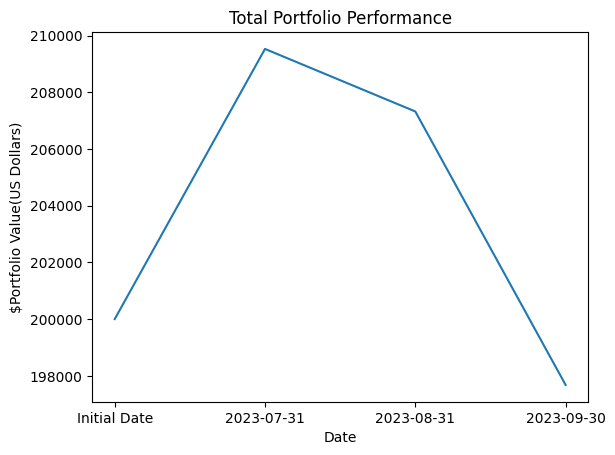

In [ ]:
import matplotlib.pyplot as plt
x = assetValueDf.columns[1:]
y = assetValueDf.iloc[-1][1:].values
plt.plot(x,y)
plt.title("Total Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("$Portfolio Value(US Dollars)")

Text(0, 0.5, 'Liquidity Ratio')

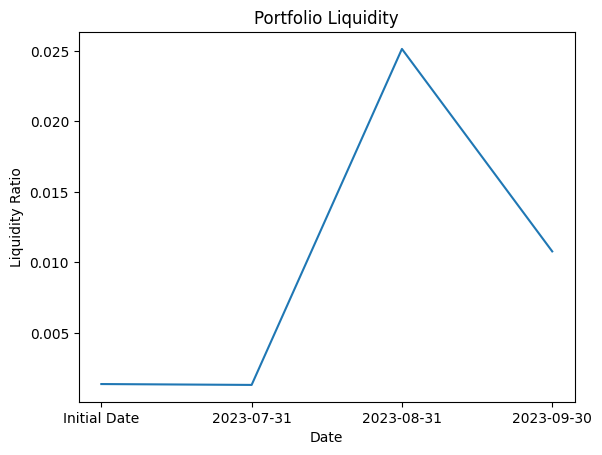

In [ ]:
import matplotlib.pyplot as plt
x = assetValueDf.columns[1:]
ind = assetValueDf.loc[(assetValueDf["Stock"] == "Cash")].index
y = (assetValueDf.iloc[ind[0]][1:].values) / (assetValueDf.iloc[-1][1:].values)
plt.plot(x,y)
plt.title("Portfolio Liquidity")
plt.xlabel("Date")
plt.ylabel("Liquidity Ratio")


In [ ]:

import yfinance as yf
msft = yf.Ticker("AAPL")
dateList = list(df['Date'])
hist = msft.history(start=)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-14 00:00:00-04:00,143.458940,143.667708,137.375037,137.563919,88598000,0.0,0.0
2022-10-17 00:00:00-04:00,140.238066,142.057260,139.442781,141.570160,85250900,0.0,0.0
2022-10-18 00:00:00-04:00,144.631996,145.834852,139.780771,142.902252,99136600,0.0,0.0
2022-10-19 00:00:00-04:00,140.854396,144.095165,140.665514,143.011597,61758300,0.0,0.0
2022-10-20 00:00:00-04:00,142.176575,145.029645,141.808746,142.544388,64522000,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-09 00:00:00-04:00,176.809998,179.050003,175.800003,178.990005,42390800,0.0,0.0
2023-10-10 00:00:00-04:00,178.100006,179.720001,177.949997,178.389999,43698000,0.0,0.0
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0
